# `Machine Learning & Deep Learning`

In [1]:
import numpy as np
import scipy
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

np.random.seed(42)

## Dimension reduction and feature extraction

In machine learning and statistics, dimensionality reduction or dimension reduction is the process
of reducing the number of features under consideration, and can be divided into feature
selection (not addressed here) and feature extraction  
  
 The goal is to learn a transformation that extracts a few relevant features. This is generally
done by exploiting the covariance between the input features.

### Singular value decomposition and matrix factorization

**dataset**

In [2]:
n_samples = 100
experience = np.random.normal(n_samples)
salary = 1500 + experience + np.random.normal(n_samples, scale=0.5)
X = np.column_stack([experience, salary])
X

array([[ 100.49671415, 1700.427582  ]])

**PCA using SVD**

In [3]:
X -= X.mean(axis=0)               # Centering is required
U, s, Vh = scipy.linalg.svd(X, full_matrices=False)

* U : Unitary matrix having left singular vectors as columns. Of shape (n_samples,n_samples) or (n_samples,n_comps), depending on full_matrices.  
  
* s: The singular values, sorted in non-increasing order. Of shape (n_comps,) with n_comps = min(n_samples, n_features).  
  
* Vh: Unitary matrix having right singular vectors as rows. Of shape (n_features, n_features) or (n_comps, n_features) depending on full_matrices.

C:\Users\Sony\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


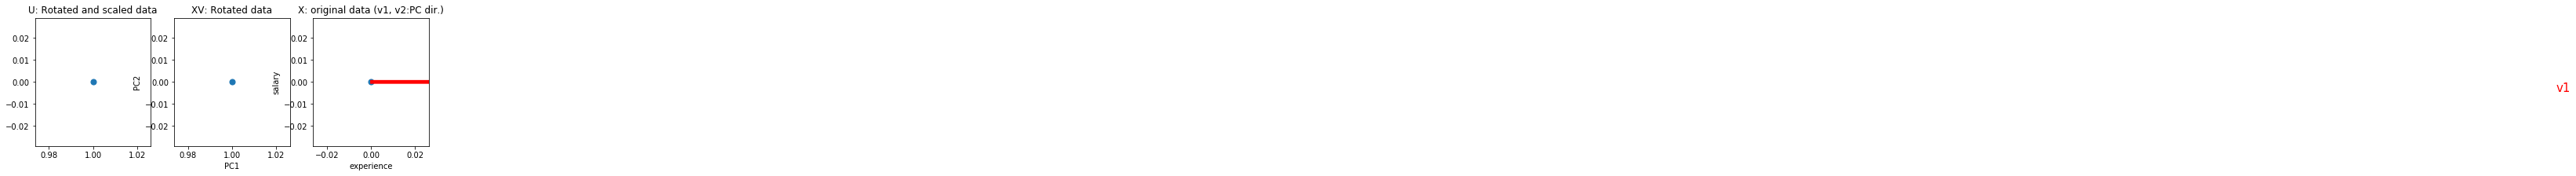

In [4]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(Vh[:, 0], Vh[:, 1], s=50)
plt.axis('equal')
plt.title("U: Rotated and scaled data")
plt.subplot(132)
# Project data
PC = np.dot(X, Vh.T)
plt.scatter(Vh[:, 0], Vh[:, 1], s=50)
plt.axis('equal')
plt.title("XV: Rotated data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], s=50)
for i in range(Vh.shape[0]):
    plt.arrow(x=0, y=0, dx=Vh[i, 0], dy=Vh[i, 1], head_width=0.2,
    head_length=0.2, linewidth=2, fc='r', ec='r')
    plt.text(Vh[i, 0], Vh[i, 1],'v%i' % (i+1), color="r", fontsize=15,
    horizontalalignment='right', verticalalignment='top')
plt.axis('equal')
plt.ylim(-4, 4)
plt.title("X: original data (v1, v2:PC dir.)")
plt.xlabel("experience")
plt.ylabel("salary")
plt.tight_layout()

C:\Users\Sony\anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


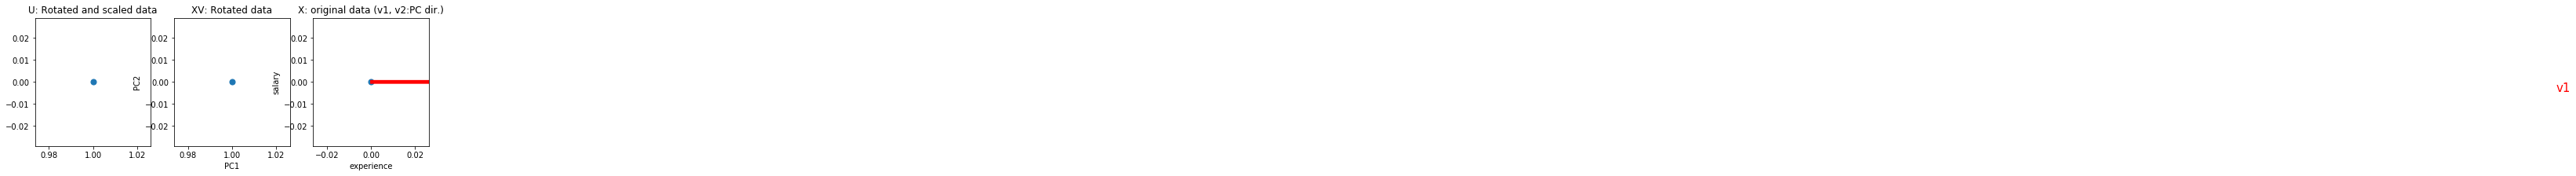

In [20]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(Vh[:, 0], Vh[:, 1], s=50)
plt.axis('equal')
plt.title("U: Rotated and scaled data")
plt.subplot(132)
# Project data
PC = np.dot(X, Vh.T)
plt.scatter(Vh[:, 0], Vh[:, 1], s=50)
plt.axis('equal')
plt.title("XV: Rotated data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], s=50)
for i in range(Vh.shape[0]):
    plt.arrow(x=0, y=0, dx=Vh[i, 0], dy=Vh[i, 1], head_width=0.2,
    head_length=0.2, linewidth=2, fc='r', ec='r')
    plt.text(Vh[i, 0], Vh[i, 1],'v%i' % (i+1), color="r", fontsize=15,
    horizontalalignment='right', verticalalignment='top')
plt.axis('equal')
plt.ylim(-4, 4)
plt.title("X: original data (v1, v2:PC dir.)")
plt.xlabel("experience")
plt.ylabel("salary")
plt.tight_layout()

### Principal components analysis (PCA)

* Principal components analysis is the main method used for linear dimension reduction  
  
* The idea of principal component analysis is to find the 𝐾 principal components directions (called the loadings) $V_{𝐾×𝑃}$ that capture the variation in the data as much as possible.  
  
* PCA is mathematically defined as an orthogonal linear transformation V𝐾×𝑃 that transforms the data to a new coordinate system such that the greatest variance by some projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on

In [5]:
from sklearn.decomposition import PCA
np.random.seed(42)

**dataset**

In [7]:
n_samples = 100
experience = np.random.normal(size=n_samples)
salary = 1500 + experience + np.random.normal(size=n_samples, scale=.5)
X = np.column_stack([experience, salary])

**PCA with scikit-learn**

In [8]:
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_ratio_)
PC = pca.transform(X)

[0.96321956 0.03678044]


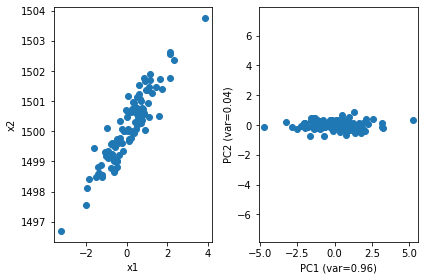

In [9]:
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("x1"); plt.ylabel("x2")
plt.subplot(122)
plt.scatter(PC[:, 0], PC[:, 1])
plt.xlabel("PC1 (var=%.2f)" % pca.explained_variance_ratio_[0])
plt.ylabel("PC2 (var=%.2f)" % pca.explained_variance_ratio_[1])
plt.axis('equal')
plt.tight_layout()

### Multi-dimensional Scaling (MDS)

**Example**  

The eurodist datset provides the road distances (in kilometers) between 21 cities in Europe.
Given this matrix of pairwise (non-Euclidean) distances D = [𝑑𝑖𝑗 ], MDS can be used to recover
the coordinates of the cities in some Euclidean referential whose orientation is arbitrary.

**Let’s not invent the wheel and use MDS implementation in Python:**

In [10]:
from sklearn.manifold import MDS
from scipy.spatial.distance import pdist, squareform
# compute MDS embedding (2D)
# Docs: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

**Can we predict the outcome of MDS from 2D to 2D?**

In [11]:
raw_data_x = np.random.uniform(0,10, size=(100,))
raw_data_y = 0.5 * raw_data_x + np.random.normal(0,1,len(raw_data_x))

X_2d = np.empty((100, 2))
X_2d[:,0] = raw_data_x
X_2d[:,1] = raw_data_y


### First, we should find pairwise distances. 
D_compressed = pdist(X_2d, metric='euclidean') # n*(n-1)/2 size
D = squareform(D_compressed)
D

array([[0.        , 2.96062348, 4.5860025 , ..., 0.7938814 , 2.05648001,
        2.14333515],
       [2.96062348, 0.        , 2.18578233, ..., 3.65289876, 4.14522887,
        1.08151494],
       [4.5860025 , 2.18578233, 0.        , ..., 5.36960249, 6.17440183,
        3.21812819],
       ...,
       [0.7938814 , 3.65289876, 5.36960249, ..., 0.        , 1.50065891,
        2.73041621],
       [2.05648001, 4.14522887, 6.17440183, ..., 1.50065891, 0.        ,
        3.07099229],
       [2.14333515, 1.08151494, 3.21812819, ..., 2.73041621, 3.07099229,
        0.        ]])

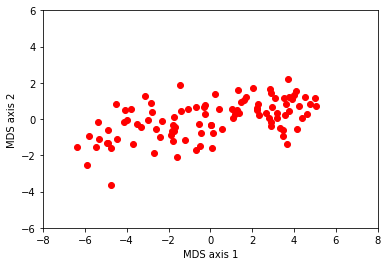

In [12]:
mds_2d = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-1 ).fit_transform(D)
plt.scatter(mds_2d[:,0], mds_2d[:,1], color='red')
plt.ylim((-6,6))
plt.xlim((-8,8))
plt.xlabel('MDS axis 1')
plt.ylabel('MDS axis 2')
plt.show()

**Restores original coordinates up to a flip…**  

**What about high dimensional data?**

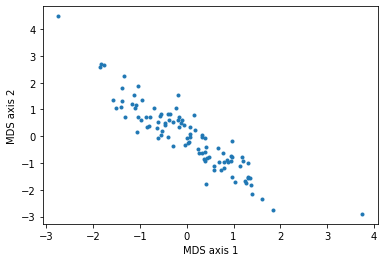

In [13]:
mds_X = MDS(n_components=2, dissimilarity='euclidean', n_jobs=4).fit_transform(X) ## distances will be computed

plt.scatter(mds_X[:,0], mds_X[:,1], marker='.')
plt.xlabel('MDS axis 1')
plt.ylabel('MDS axis 2')
plt.show()

**This is what we get as an output of the algorithm**

In [14]:
import pandas as pd
# Pairwise distance between European cities
url = 'https://raw.githubusercontent.com/neurospin/pystatsml/master/datasets/eurodist.csv'
df = pd.read_csv(url)
print(df.iloc[:7, :7])
print()
## Array with cities:
city = np.array(df["city"])

## Squareform distance matrix
D = np.array(df.iloc[:, 1:]) 
print(D.shape)
print()
print(city)

          version https://git-lfs.github.com/spec/v1
0  oid sha256:d42d9cc12cee29073581135909fbc0f0582...
1                                          size 2443



KeyError: 'city'

### Nonlinear dimensionality reduction

Nonlinear dimensionality reduction or **manifold learning** cover unsupervised methods that
attempt to identify low-dimensional manifolds within the original 𝑃-dimensional space that
represent high data density. Then those methods provide a mapping from the high-dimensional
space to the low-dimensional embedding

**Isomap**

Isomap is a nonlinear dimensionality reduction method that combines a procedure to compute
the distance matrix with MDS. The distances calculation is based on geodesic distances evaluated
on neighborhood graph:  
1. Determine the neighbors of each point. All points in some fixed radius or K nearest neighbors.  
2. Construct a neighborhood graph. Each point is connected to other if it is a K nearest neighbor. Edge length equal to Euclidean distance.  
3. Compute shortest path between pairwise of points 𝑑𝑖𝑗 to build the distance matrix D.  
4. Apply MDS on D.

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold
from sklearn.datasets import make_blobs



(-3.0595588164180825,
 3.448508977642401,
 -3.0601952611074994,
 3.539891851367879)

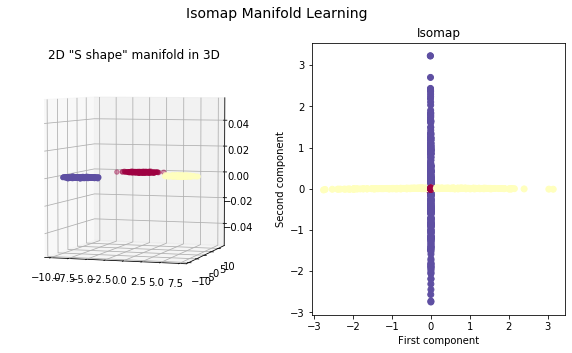

In [16]:
X, color = make_blobs(1000, random_state=42)

fig = plt.figure(figsize=(10, 5))
plt.suptitle("Isomap Manifold Learning", fontsize=14)

ax = fig.add_subplot(121, projection='3d')
ax.scatter(X[:, 0], X[:, 1], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
plt.title('2D "S shape" manifold in 3D')
Y = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(X)
ax = fig.add_subplot(122)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap")
plt.xlabel("First component")
plt.ylabel("Second component")
plt.axis('tight')

## Clustering  
Cluster analysis or clustering is the task of grouping a set of objects in such a way
that objects in the same group (called a cluster) are more similar (in some sense or another)
to each other than to those in other groups (clusters). Clustering is one of the main task of
exploratory data mining, and a common technique for statistical data analysis, used in many
fields, including machine learning, pattern recognition, image analysis, information retrieval,
and bioinformatics.

### K-means clustering

Text(0.5, 1.0, 'K=4, J=27.99')

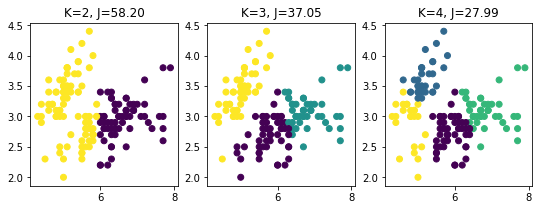

In [17]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns # nice color
%matplotlib inline

iris = datasets.load_iris()
X = iris.data[:, :2] # use only 'sepal length and sepal width'
y_iris = iris.target

km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)

plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)

plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)

plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], c=km4.labels_)#.astype(np.float))
plt.title("K=4, J=%.2f" % km4.inertia_)

#Text(0.5, 1.0, 'K=4, J=27.97')

### Model selection
#### Bayesian information criterion

In statistics, the Bayesian information criterion (BIC) is a criterion for model selection among
a finite set of models; the model with the lowest BIC is preferred. It is based, in part, on the
likelihood function and it is closely related to the Akaike information criterion (AIC).

In [23]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sn   # nice color
import sklearn
from sklearn.mixture import GaussianMixture


Choosen K= 2


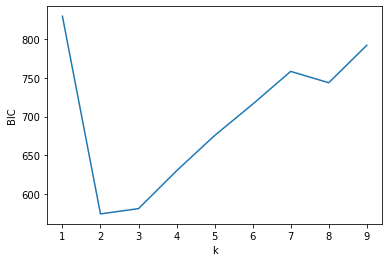

In [24]:
X = iris.data
y_iris = iris.target

bic = list()
ks = np.arange(1,10)

for k in ks:
    gmm = GaussianMixture(n_components=k, covariance_type='full')
    gmm.fit(X)
    bic.append(gmm.bic(X))
    
k_chosen = ks[np.argmin(bic)]

plt.plot(ks, bic)
plt.xlabel("k")
plt.ylabel("BIC")

print("Choosen K=", k_chosen)

### Hierarchical clustering

Hierarchical clustering is an approach to clustering that build hierarchies of clusters in two main approaches:  

• Agglomerative: A bottom-up strategy, where each observation starts in their own cluster, and pairs of clusters are merged upwards in the hierarchy.  

• Divisive: A top-down strategy, where all observations start out in the same cluster, and then the clusters are split recursively downwards in the hierarchy.  

In order to decide which clusters to merge or to split, a measure of dissimilarity between clusters is introduced. More specific, this comprise a distance measure and a linkage criterion. The distance measure is just what it sounds like, and the linkage criterion is essentially a function of the distances between points, for instance the minimum distance between points in two clusters, the maximum distance between points in two clusters, the average distance between points in two clusters, etc. One particular linkage criterion, the Ward criterion, will be discussed next.